# Transport Matrix OCIM

Transport matrix models (TMM) are an efficient means of representing the advection and turbulent diffusion of biogeochemical compounds in the ocean. In its simplest form the advection-diffusion of a tracer can be numerically estimated as a matrix equation 
$$\frac{d \mathbf{c}}{d t} = \mathbf{A}\mathbf{c} +  \mathbf{B}\mathbf{f}(t) + \mathbf{q}(t)$$
where $\mathbf{c}$ is the concentration of a tracer (e.g. dissolved inorganic carbon), $\mathbf{q}(t)$ is a source term of $\mathbf{c}$ (we will refer to this as injection), and $\mathbf{B}\mathbf{f}(t)$ represents the boundary conditions at the ocean surface. The advection-diffusion of the dissolved material is expressed in the transport matrix $\mathbf{A}$. That is, $\mathbf{A}$ is a numerical approximation of the operator
$$\mathcal{A} = - \mathbf{u}\cdot\nabla + \nabla\mathcal{K}\cdot\nabla + \mathcal{K}\nabla ^2 + \lambda$$
where $\mathbf{u}$ is the velocity field and $\mathcal{K}$ is the turbulent eddy diffusion tensor, and $\lambda$ is a (possible) decay rate (e.g. radioactive decay; we will ignore this term here). The matrices $ \mathbf{A}$ and $ \mathbf{B}$ are of dimensions $N\times N$ where $N$ is the number of boxes in the discretised ocean, while $\mathbf{c}$, $\mathbf{q}$ and $\mathbf{f}$ are vectors of dimension $N$ with ordinates $n \in \Omega_\mathrm{ocean}$ . 

At steady state this system can be readily solved as $\mathbf{c}_\infty = - \left[\mathbf{A} +  \mathbf{S}\right]^{-1} \mathbf{q}$ where the boundary condition is of the form $\mathbf{S} \mathbf{c}$. Specifically, if the elements of $\mathbf{S}$ are large and negative on the ocean surface $n \in \Omega_\mathrm{surface}$, then the surface acts as a strong sink. That is, $\mathbf{c}_\infty$ is the distribution at steady state of a tracer injected into the ocean interior according to $ \mathbf{q}$ and dissappearing on the ocean surface. 



### Reading the Transport Matrix $\mathbf{A}$ from MATLAB and grid information from matlab structure `CTL.mat`

The file `CTL.mat` containing OCIM transport matrix as additional information has been developed by Tim deVries at the University of Sanata Barbra aand can be downloaded at https://tdevries.eri.ucsb.edu/models-and-data-products/. Any use of this product should be referenced to DeVries, T. (2014).

The following also indicates how to read the mean First Passage Time `fp1.mat` from MATLAB. This and similar files are produced by, for instance, running `PassageTimes1000` in MatLab

References \
<small>
DeVries, T. (2014), The oceanic anthropogenic CO2 sink: Storage, air-sea fluxes, and transports over the industrial era, Global Biogeochem. Cycles, 28, 631–647, doi:10.1002/2013GB004739 \
DeVries, T., & Holzer, M. (2019). Radiocarbon and helium isotope constraints on deep ocean ventilation and mantle-3He sources. Journal of Geophysical Research: Oceans, 124. https://doi.org/10.1029/2018JC014716
</small>

In [1]:
import scipy
from scipy.io import loadmat
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, csr_array
import numpy as np
from pathlib import Path

# Current working directory
cwd = Path.cwd()

fp1_mat_path = r"C:\Users\avis\Desktop\JuptyerNBProjects\fp1.mat"
fp1data = loadmat(
    fp1_mat_path,  # as calculated from OCIM
    squeeze_me=True,   # turn Nx1 arrays into scalars/vectors
    struct_as_record=False  # map MATLAB structs to Python objects
)
fp1_MatLab = fp1data['fp1']

CTL_mat_path = r"C:\Users\avis\Desktop\JuptyerNBProjects\OCIM2\CTL.mat"
CTL = loadmat(
    CTL_mat_path,  # as calculated from OCIM
    squeeze_me=True,   # turn Nx1 arrays into scalars/vectors
    struct_as_record=True  # map MATLAB structs to Python objects
)

print('CTL has keys: ',CTL.keys())

output = CTL['output']
grid = output['grid'].tolist()
msk = output['msk'].tolist()
M3d = output['M3d'].tolist()
TR = scipy.sparse.csr_array(output['TR'].tolist())
hkeep = msk['hkeep'].tolist()
pkeep = msk['pkeep'].tolist()
ckeep = msk['ckeep'].tolist()
print('hkeep are the MatLab ordinates of the surface ocean. It is of ', type(hkeep), ' and shape ', hkeep.shape,' and data type ',hkeep.dtype)
print('pkeep are the MatLab ordinates of the entire ocean. It is of ', type(pkeep), ' and shape ', pkeep.shape,' and data type ',pkeep.dtype)
print('ckeep are the MatLab ordinates of the sub-surface ocean. Is of ', type(ckeep), ' and shape ', ckeep.shape,' and data type ',ckeep.dtype)
print('M3d is of ', type(M3d), ' and shape ', M3d.shape,' and data type ',M3d.dtype)
print('TR is the transport matrix of type', type(TR), ' and shape ', TR.shape)
DXT3d = grid['DXT3d'].tolist()
DYT3d = grid['DYT3d'].tolist()
DZT3d = grid['DZT3d'].tolist()
zw = grid['zw'].tolist()
xt = grid['xt'].tolist()
yt = grid['yt'].tolist()
zt = grid['zt'].tolist()
dzw = grid['dzw'].tolist()
VOL = DXT3d*DYT3d*DZT3d
print('VOL: shape ', VOL.shape, 'and data type ', VOL.dtype)
O2d = M3d.sum(axis=2).astype(np.uint8) # O2d is the ordinate 
#print(TR)

CTL has keys:  dict_keys(['__header__', '__version__', '__globals__', 'output', 'sol'])
hkeep are the MatLab ordinates of the surface ocean. It is of  <class 'numpy.ndarray'>  and shape  (10441,)  and data type  uint16
pkeep are the MatLab ordinates of the entire ocean. It is of  <class 'numpy.ndarray'>  and shape  (200160,)  and data type  int32
ckeep are the MatLab ordinates of the sub-surface ocean. Is of  <class 'numpy.ndarray'>  and shape  (189719,)  and data type  int32
M3d is of  <class 'numpy.ndarray'>  and shape  (91, 180, 24)  and data type  uint8
TR is the transport matrix of type <class 'scipy.sparse._csr.csr_array'>  and shape  (200160, 200160)
VOL: shape  (91, 180, 24) and data type  float64


### Steady state solution $\mathbf{c_\infty}$ for an injection vector $\mathbf{q}$

This can be found as $\mathbf{c}_\infty = - \left[\mathbf{A} +  \mathbf{S}\right]^{-1} \mathbf{q}$. Here $\mathbf{S}$ represents a strong sink term to remove any tracer from the surface ocean.  We use $\mathbf{LU}$ decomposition to solve this equation. Note that in order to make this tractible, we use sparse matrix representation of the Transport Matrix.

 location mask :  1  and maximum depth index  19
LU decomposition under way - start: 2.640625
LU decomposition done - CPU time: 138.859375 seconds
shape of c : (200160,)
float64


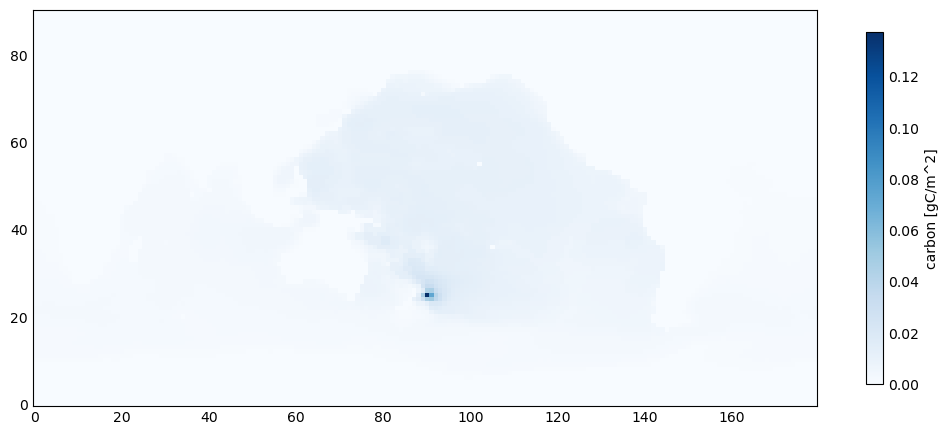

In [2]:
import matplotlib.pyplot as plt
import time
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, csr_array
from scipy.sparse.linalg import splu
from scipy.sparse import diags
import numpy as np

diagnostics = False

Q = np.zeros(M3d.shape)
C = np.zeros(M3d.shape)

lat = -40;  lon = 180 # latitude and longitude in degrees
ilat = ((90 + lat) % 180) // 2;  ilon = (lon % 360) // 2 # indices in the matrx fields
print(' location mask : ', M3d[ilat,ilon,0],' and maximum depth index ', O2d[ilat,ilon] )

# Martin curve
zwo = np.append(zw,(zw[-1] + dzw[-1]))  # extends depth lebvels all the way to the bottom [0:24]
z0 = zwo[1]; b = 0.83 # Martin curve parameters
fflux = 0*zwo; fflux[1:] = (zwo[1:]/z0)**(-b); fflux[0] = 1; fflux[-1] = 0

kz = M3d[ilat,ilon,:]
fflux[0:-1] = fflux[0:-1]*kz
finjt = -(fflux[0:-1] - fflux[1:])/(zwo[0:-1] - zwo[1:])
Q[ilat,ilon,:] = finjt
if diagnostics :
    print(fflux); print(zwo); print(kz); print(finjt)

Q = Q.reshape(-1, order='F') # order='F' i.e. Fortran ensures the matrices are dimensionalized accorsing to Matlab so the hkeep etc point to the correct cell.
C = C.reshape(-1, order='F')
V = VOL.reshape(-1, order='F')
q = Q[pkeep-1]
v = V[pkeep-1]
#print('shape of q :', q.shape)

m = TR.shape[0]  # set boundary conditions
sink = np.zeros(m, dtype=float) # sink is a column vector (m x 1 in MATLAB)
sink[hkeep-1] = 1e10            # instantaneous Surface SINK
SSINK = diags(sink, offsets=0, shape=(m, m), format='csr')

A = - TR + SSINK; A = csc_matrix(A)  # ensure CSC for SuperLU

start = time.process_time()
print(f"LU decomposition under way - start: {start:.6f}")
lu = splu(A, permc_spec='COLAMD', diag_pivot_thresh=1.0)
c = lu.solve(q)
end = time.process_time()
print(f"LU decomposition done - CPU time: {end - start:.6f} seconds")

print('shape of c :', c.shape)

C[pkeep-1] = c
C = C.reshape(91,180,24, order='F')
Q = Q.reshape(91,180,24, order='F')
C = C*M3d
C[C<0]=0
C = C*DZT3d
C_area = C.sum(axis=2)

print(C_area.dtype)

plt.style.use('_mpl-gallery-nogrid')

plt.figure(figsize=(10, 6))
plt.imshow(C_area, origin='lower')
cbar = plt.colorbar(label='carbon [gC/m^2]',shrink=.6)

plt.show()

In [3]:
print(f"the total injected carbon is : {sum(q*v)/1E15:.6f} PgC/year")
print(f"the sequestered carbon is : {sum(c*v)/1E15:.6f} PgC/year")
print(f"the mean first passage time is : {sum(c*v)/sum(q*v):.0f} years")
print(f"max depth at location : {zwo[O2d[ilat,ilon]]:.0f} m")

the total injected carbon is : 0.000038 PgC/year
the sequestered carbon is : 0.001761 PgC/year
the mean first passage time is : 47 years
max depth at location : 3068 m


### A better mapping routine for the above

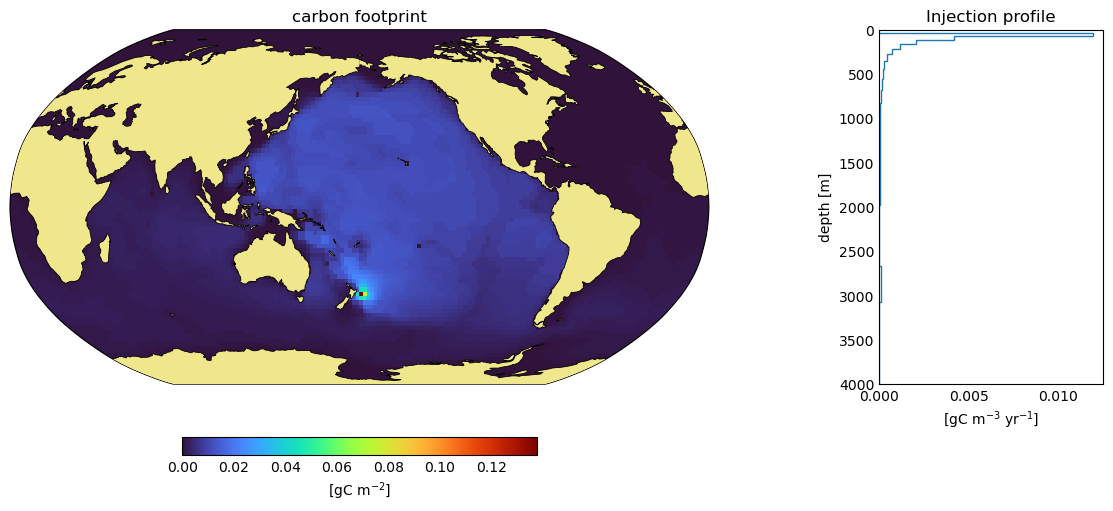

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from matplotlib.gridspec import GridSpec

lats = np.linspace(-89, 89, 91)
lons = np.linspace(1, 359, 180)
lon2d, lat2d = np.meshgrid(lons, lats)

# Example scalar field Q(lat, lon)
C_plot = C_area

C_plot_cyc, lons_cyc = add_cyclic_point(C_plot, coord=lons)

fig = plt.figure(figsize=(12, 5), constrained_layout=True)
gs = GridSpec(ncols=2, nrows=1, figure=fig, width_ratios=[4, 1])

proj = ccrs.Robinson(central_longitude=180)  # <-- center on Pacific
ax_map = fig.add_subplot(gs[0, 0], projection=proj)

pc = ax_map.pcolormesh(lons_cyc, lats, C_plot_cyc, transform=ccrs.PlateCarree(), cmap='turbo', shading='auto')
pc.set_zorder(1)
ax_map.add_feature(cfeature.LAND.with_scale('110m'), facecolor='khaki', edgecolor='none', zorder=3)
ax_map.coastlines(resolution='110m', linewidth=0.6, zorder=4)
ax_map.set_title('carbon footprint')
cbar = fig.colorbar(pc, ax=ax_map, orientation='horizontal', pad=0.02, fraction=0.05)
cbar.set_label(r'[gC m$^{-2}$]')

ax_prof = fig.add_subplot(gs[0, 1])
stairs = ax_prof.stairs(values=finjt, edges=zwo, orientation='horizontal', color='tab:blue', linewidth=1)
ax_prof.axvline(0, color='k', lw=0.2)

ax_prof.set_ylim(0, 4000)
ax_prof.set_xlabel(r'[gC m$^{-3}$ yr$^{-1}$]')
ax_prof.set_ylabel('depth [m]')
ax_prof.set_title('Injection profile')
ax_prof.invert_yaxis()

plt.show()

## Greens functions
The general time dependent solution for the system can also be found and be formalized as
$$\mathbf{c}(t) = e^{\mathbf{A}t} \mathbf{c}_0 + \int_0^t e^{\mathbf{A}(t-t')} (\mathbf{B}\mathbf{f}(t') + \mathbf{q}(t')) dt'  $$
Here we assume $\mathbf{A}$ and $\mathbf{B}$ are time invariant, although more general time dependent solution schemes exist. The system can be rewritten in terms of the Green's function $\mathbf{G}(t) = e^{\mathbf{A}t}$ to give
$$\mathbf{c}(t) = \mathbf{G}(t) \mathbf{c}_0 + \int_0^t \mathbf{G}(t-t') (\mathbf{B}\mathbf{f}(t') + \mathbf{q}(t')) dt'  $$
A specific element of the Green's function matrix $\mathbf{G}(r,c)(t)$ represent the transfer from a source box row $r$ at time $t$ to a reciever box column $c$ at time 0.

We can note that because $e^{\mathbf{A}(t-t')}e^{\mathbf{A}(t'-t'')}=e^{\mathbf{A}(t'-t'')}$, $\mathbf{G}(t-t')\mathbf{G}(t'-t'')=\mathbf{G}(t'-t'')$. Further we note the decomposition
$$ \mathbf{G}(t) = e^{\mathbf{A}t} = \mathbf{V} e^{\mu t} \mathbf{V}^{-1}$$
based on the eigen decomposition of $\mathbf{A}$, that is $\mathbf{A}\mathbf{V}= \mathbf{V} \mu$


Script to load variables from files

## First and Last Passage Time

The Green's function $\mathbf{G}$ introduced above is a discretizion of the more general Green's function 
$\mathcal{G}(\mathbf{x}_i,t_i|\mathbf{x}_j,t_j)$ 
which essentailly represents the **probablity** that a tracer found at a location $\mathbf{x}_j$ at time $t_j$ that was at location $\mathbf{x}_i$ at time $t_i$. $\mathcal{G}$ has units [m$^{-3}$ s$^{-1}$]. The Green's function is the solutions to
$$ (\partial_t - \mathcal{A}) \mathcal{G}(\mathbf{x},t|\mathbf{x}',t') = \delta(t-t')  \delta^3(\mathbf{x}-\mathbf{x}')$$
or at steady state
$$ - \mathcal{A} \mathcal{G'}(\mathbf{x},t|\mathbf{x}',t') = \delta(t-t')  \delta^3(\mathbf{x}-\mathbf{x}')$$

The last and first passage times are specific impementations where the locations in the surface ocean are targetted either as a source of a sink of tracer. The **first passage time** associated with a particular point $\mathbf{x}$ is the mean the time for a tracer to transit from that point to any point in the surface ocean $\mathbf{x}_s \in \Omega_s$. cific impementations where the locations in the surface ocean are targetteed either as a source of a sink of tracer. Conversely the **last passage time** associated with a particular point $\mathbf{x}$ is the mean the time for a tracer to transit from any point in the surface ocean $\mathbf{x}_s \in \Omega_s$ to that point. The latter is sometimes referred to as the **ideal age**. Specifically, writing $\mathcal{L}(\mathbf{x}_s,\tau|\mathbf{x}) = \mathcal{G'}(\mathbf{x}_s,t_s|\mathbf{x},t)$, the mean last passage time is

$$  \mathcal{T}_\mathrm{L0}(\mathbf{x}) = \int \tau' \int_{\Omega_s} \mathcal{L}(\mathbf{x}_s,\tau|\mathbf{x}) d\mathbf{x}_s \quad d\tau'$$

In discreteized form, given the solutions $m_1 = - \mathbf{A}^{-1}$ and $m_2 = -2 \mathbf{A}^{-1}m_1$ the mean last passage time is given by $\mathbf{T}_\mathrm{L1} = m_1$ and its variance is by $\mathbf{T}_\mathrm{L2}= \sqrt{m_2 - m_1^2 }$.


The following code calculates the mean first and last passage times to and from the surface layer for every ocean grid cell in the ocean interior. This is a Python rendering of the MatLab code `eqage.m` that can be found on OCIM web site developed by Tim deVries at the University of Sanata Barbra and can be downloaded at https://tdevries.eri.ucsb.edu/models-and-data-products/. Any use of this product should be referenced to DeVries, T. (2014), The oceanic anthropogenic CO2 sink: Storage, air-sea fluxes, and transports over the industrial era, Global Biogeochem. Cycles, 28, 631–647, doi:10.1002/2013GB004739.

In [5]:
import time
from scipy.sparse import csr_matrix, csc_matrix, coo_matrix, csr_array
from scipy.sparse.linalg import splu
import numpy as np

start = time.process_time()

iocn = pkeep-1
iint = ckeep-1
isur = hkeep-1
kint = isur.shape[0]
print(iint.shape)
print(iocn.shape)
A = TR[kint:, :][:, kint:]   # A is only the interior transport components
print('A is the transport matrix of type', type(A), ' and shape ', A.shape)

# print(A) # same form as in Matlab eqage
start = time.process_time(); print(start, 'LU factorization of the transport matrix - the heavy lifting...')

A = csc_matrix(A)  # ensure CSC for SuperLU
rhs = np.ones(ckeep.shape[0])
n = np.arange(0, ckeep.shape[0])
Alu = splu(A, permc_spec='COLAMD', diag_pivot_thresh=1.0)

end = time.process_time(); print(end, 'Compute last paggage time (i.e. ideal age)')

lp1 = -Alu.solve(rhs)
lp2 = -2*Alu.solve(lp1)
lp2 = np.sqrt(np.clip(lp2 - lp1**2, 0.0, None)) # removes small negative numbers

print(f"CPU time: {end - start:.6f} seconds")

VOL = DXT3d*DYT3d*DZT3d

Q = np.zeros(M3d.shape)
C = np.zeros(M3d.shape)

Q = Q.reshape(-1, order='F')
C = C.reshape(-1, order='F')
V = VOL.reshape(-1, order='F')
w = V[ckeep-1]

start = time.process_time(); print(start, 'LU factorization of W - should be faster...')

y = Alu.solve(w, trans='T')

W = coo_matrix((w, (n, n)), shape=(ckeep.shape[0],ckeep.shape[0]))
W = csc_matrix(W)  # ensure CSC for SuperLU
Wlu = splu(W, permc_spec='COLAMD', diag_pivot_thresh=1.0)

end = time.process_time(); print(end, 'Compute first paggage time')

fp1 = -Wlu.solve(y)
fp2 = -2*Alu.solve(fp1)
fp2 = np.sqrt(np.clip(fp2 - fp1**2, 0.0, None)) # removes small negative numbers

end = time.process_time(); print(end)
print(f"DONE: CPU time: {end - start:.6f} seconds")

(189719,)
(200160,)
A is the transport matrix of type <class 'scipy.sparse._csr.csr_array'>  and shape  (189719, 189719)
143.796875 LU factorization of the transport matrix - the heavy lifting...
269.890625 Compute last paggage time (i.e. ideal age)
CPU time: 126.093750 seconds
271.71875 LU factorization of W - should be faster...
272.078125 Compute first paggage time
273.0
DONE: CPU time: 1.281250 seconds


Check to see if the first passage time estimates from this code is the same as `eqage.mat` 

In [6]:

FP1 = np.zeros(M3d.shape); FP1 = FP1.reshape(-1, order='F'); FP1[ckeep-1] = fp1; FP1 = FP1.reshape(91,180,24, order='F')
FP1
print(fp1)
fp1_MatLab = fp1_MatLab.reshape(-1, order='F')
print(fp1_MatLab[ckeep-1])

[3.76977745e-03 2.05400967e-02 7.57224159e-04 ... 7.76958268e+02
 7.81970704e+02 7.62714406e+02]
[3.76977745e-03 2.05400967e-02 7.57224159e-04 ... 7.76958268e+02
 7.81970704e+02 7.62714406e+02]


**First passage time at the sea floor**

In [7]:
k = np.nonzero(O2d > 0) 
fp1_sea_floor = np.zeros(O2d.shape)
k_sel = [k[0],k[1],O2d[k]-1]
fp1_sea_floor[k[0],k[1]] = FP1[k[0],k[1],O2d[k]-1]

(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

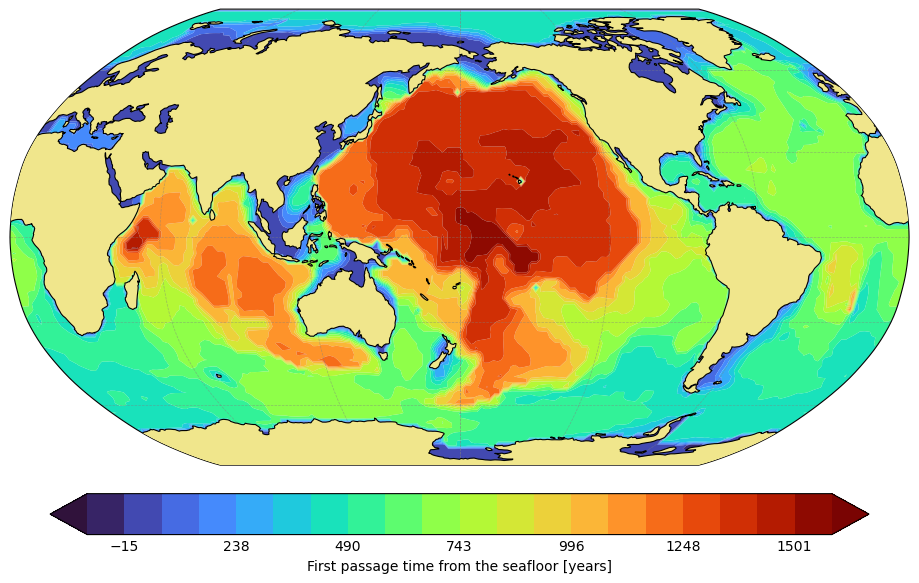

In [8]:
from plotting_stuff import plot_f_map
lats = np.linspace(-89, 89, 91)
lons = np.linspace(1, 359, 180)
plot_f_map(fp1_sea_floor,lons,lats,colorbar_label = 'First passage time from the seafloor [years]',)

In [9]:
print(k)
time_scale = 200
k_time_scale = M3d*0
k_time_scale[FP1<100] = 1
k_time_scale = k_time_scale*M3d
k2d = k_time_scale.sum(axis=2).astype(np.uint8) # O2d is the ordinate
depth_time_scale = np.zeros(O2d.shape)
depth_time_scale = zwo[k2d]

(array([ 6,  6,  6, ..., 89, 89, 89]), array([ 81,  82,  83, ..., 177, 178, 179]))


(<Figure size 1200x600 with 2 Axes>, <GeoAxes: >)

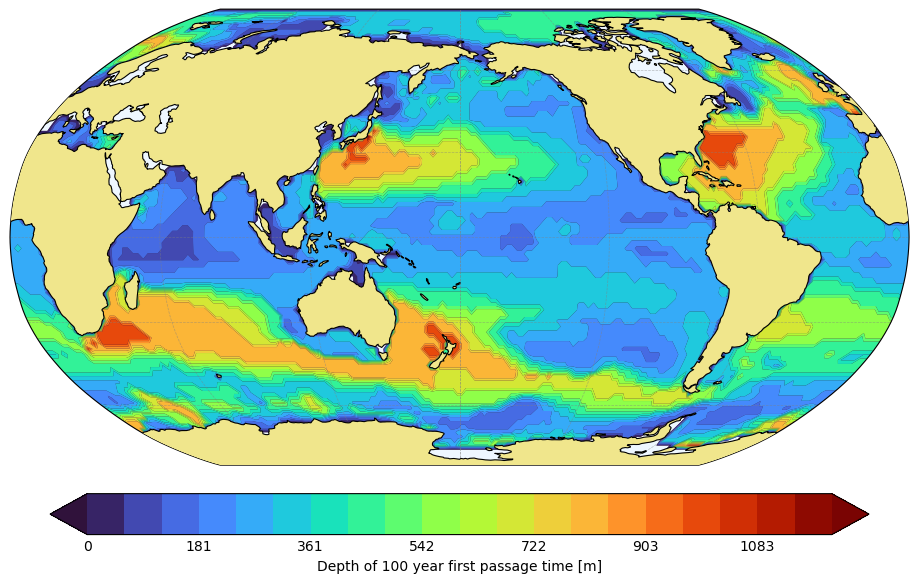

In [10]:
from plotting_stuff import plot_f_map
lats = np.linspace(-89, 89, 91)
lons = np.linspace(1, 359, 180)
plot_f_map(depth_time_scale,lons,lats,colorbar_label = 'Depth of 100 year first passage time [m]')

latitude : -49.450549450549445


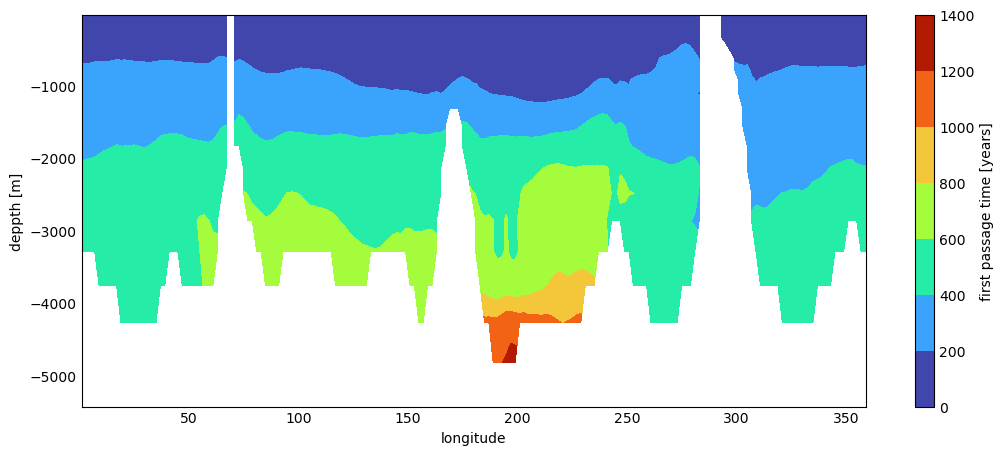

In [11]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from numpy.ma import masked_where

ilatitude = 20
print('latitude :', yt[ilatitude])

X, Z = np.meshgrid(xt, zt)

fpt_lat = np.transpose(FP1[ilatitude,:,:])
fpt_lat.shape
fpt_lat[fpt_lat <0] = 0
iocn = np.transpose(M3d[ilatitude,:,:])

fig, ax = plt.subplots(figsize=(10,4))

fpt_lat_masked = masked_where(iocn < 1, fpt_lat)
ax.set_xlabel('longitude')
ax.set_ylabel('deppth [m]')

cax = ax.contourf(X,-Z,fpt_lat_masked, origin='lower',cmap=mpl.cm.turbo)
fig.colorbar(cax,ax=ax,label='first passage time [years]',shrink=1)

plt.show()